# Probablity

In [12]:
d = {(i, j): i + j for i in range(1, 7) for j in range(1, 7)}
from collections import defaultdict
dinv = defaultdict(list)
for key, value in d.items():
    dinv[value].append(key)
print(dinv)
print(dinv[7])
X={i:len(j)/36. for i,j in dinv.items()}
print(X)

defaultdict(<class 'list'>, {2: [(1, 1)], 3: [(2, 1), (1, 2)], 4: [(1, 3), (3, 1), (2, 2)], 5: [(3, 2), (1, 4), (2, 3), (4, 1)], 6: [(5, 1), (4, 2), (3, 3), (1, 5), (2, 4)], 7: [(1, 6), (2, 5), (3, 4), (6, 1), (5, 2), (4, 3)], 8: [(2, 6), (3, 5), (4, 4), (6, 2), (5, 3)], 9: [(3, 6), (4, 5), (5, 4), (6, 3)], 10: [(6, 4), (4, 6), (5, 5)], 11: [(6, 5), (5, 6)], 12: [(6, 6)]})
[(1, 6), (2, 5), (3, 4), (6, 1), (5, 2), (4, 3)]
{2: 0.027777777777777776, 3: 0.05555555555555555, 4: 0.08333333333333333, 5: 0.1111111111111111, 6: 0.1388888888888889, 7: 0.16666666666666666, 8: 0.1388888888888889, 9: 0.1111111111111111, 10: 0.08333333333333333, 11: 0.05555555555555555, 12: 0.027777777777777776}


In [15]:
d = {(i, j, k): ((i*j*k) / 2 > i+j+k) for i in range(1, 7) 
                                              for j in range(1,7)
                                                 for k in range(1,7)}
dinv = defaultdict(list)
for i, j in d.items(): dinv[j].append(i)
X = {i:len(j)/ 6.0**3 for i, j in dinv.items() }
print(X)

{False: 0.37037037037037035, True: 0.6296296296296297}


In [28]:
from pandas import DataFrame
d = DataFrame(index=[(i,j) for i in range(1, 7) for j in range(1, 7)], 
              columns=['sm', 'd1', 'd2', 'pd1', 'pd2', 'p'])
d.d1 = [i[0] for i in d.index]
d.d2 = [i[1] for i in d.index]
d.sm=list(map(sum, d.index))

d.head(5)

,sm,d1,d2,pd1,pd2,p
"(1, 1)",2,1,1,NaN,NaN,NaN
"(1, 2)",3,1,2,NaN,NaN,NaN
"(1, 3)",4,1,3,NaN,NaN,NaN
"(1, 4)",5,1,4,NaN,NaN,NaN
"(1, 5)",6,1,5,NaN,NaN,NaN


In [33]:
d.loc[d.d1 <= 3, 'pd1'] = 1/9.
d.loc[d.d1 > 3, 'pd1'] = 2/9.
d.pd2 = 1 / 6
d.head(20)

,sm,d1,d2,pd1,pd2,p
"(1, 1)",2,1,1,0.111111,0.166667,NaN
"(1, 2)",3,1,2,0.111111,0.166667,NaN
"(1, 3)",4,1,3,0.111111,0.166667,NaN
"(1, 4)",5,1,4,0.111111,0.166667,NaN
"(1, 5)",6,1,5,0.111111,0.166667,NaN
"(1, 6)",7,1,6,0.111111,0.166667,NaN
"(2, 1)",3,2,1,0.111111,0.166667,NaN
"(2, 2)",4,2,2,0.111111,0.166667,NaN
"(2, 3)",5,2,3,0.111111,0.166667,NaN
"(2, 4)",6,2,4,0.111111,0.166667,NaN


In [34]:
d.p = d.pd1 * d.pd2
d.head(5)

,sm,d1,d2,pd1,pd2,p
"(1, 1)",2,1,1,0.111111,0.166667,0.0185185
"(1, 2)",3,1,2,0.111111,0.166667,0.0185185
"(1, 3)",4,1,3,0.111111,0.166667,0.0185185
"(1, 4)",5,1,4,0.111111,0.166667,0.0185185
"(1, 5)",6,1,5,0.111111,0.166667,0.0185185


In [35]:
d.groupby('sm')['p'].sum()

sm
2     0.018519
3     0.037037
4     0.055556
5     0.092593
6     0.129630
7     0.166667
8     0.148148
9     0.129630
10    0.111111
11    0.074074
12    0.037037
Name: p, dtype: float64

# Independence

In [36]:
import numpy as np
x, y = np.random.rand(2, 1000)
a, b, c = x, (y-x), 1-y
s = (a+b+c) / 2
np.mean((s>a) & (s>b) & (s>c) & (y>x))

0.13100000000000001

In [40]:
from sympy.abc import x,y
from sympy import integrate, simplify

fxy = x + y
fy = integrate(fxy, (x, 0, 1))
fx = integrate(fxy, (y, 0, 1))
print(fy)
print(fx)
EXY = ( 3*y+2 ) / ( 6*y+3 )

print(EXY)
LHS=integrate((x - EXY)**2*fxy, (x, 0, 1), (y, 0, 1))
print(LHS)

y + 1/2
x + 1/2
(3*y + 2)/(6*y + 3)
-log(3)/144 + 1/12


In [43]:
RHS=integrate((x)**2*fx, (x, 0, 1)) - integrate((EXY)**2*fy, (y, 0, 1))
print(RHS)

-log(3)/144 + 1/12


# Conditional Expection and Mean Square Error

In [49]:
import sympy as S
from sympy.stats import density, E, Die
x = Die('D1', 6)
print(x)
y = Die('D2', 6)
print(y)
a = S.symbols('a')
z = x + y
print(z)
J = E((x - a*(x+y)) ** 2)
print(S.simplify(J))
sol, = S.solve(S.diff(J, a), a)
print(sol)

D1
D2
D1 + D2
329*a**2/6 - 329*a/6 + 91/6
1/2


In [50]:
import numpy as np
from sympy import stats
sample_z7 = lambda: stats.sample(x, S.Eq(z, 7))
mn = np.mean([(6 - sample_z7()) ** 2 for i in range(100)])
mn0 = np.mean([(7/2. - sample_z7()) ** 2 for i in range(100)])
print("MSE=%3.2f using 6 vs MSE=%3.2f using 7 / 2" %(mn, mn0))

MSE=9.71 using 6 vs MSE=3.01 using 7 / 2


In [51]:
x = stats.FiniteRV('D3', {1:1/15., 2:1/15.,
                          3:1/15., 4:1/15.,
                          5:1/15., 6:2/3.})
E(x, S.Eq(z, 7))

5.00000000000000

In [54]:
sample_z7 = lambda: stats.sample(x, S.Eq(z,7))
mn = np.mean([(6 - sample_z7()) ** 2 for i in range(100)])
mn0 = np.mean([(5 - sample_z7()) ** 2 for i in range(100)])
print("MSE=%3.2f using 6 vs MSE=%3.2f using 7 / 2" %(mn, mn0))

MSE=3.30 using 6 vs MSE=2.09 using 7 / 2


In [60]:
import sympy as S
X10, X20, X50 = S.symbols("X10, X20, X50", real=True)
xi = 10*X10 + 20*X20 + 50*X50
eta = X10*X20*(1- X50) + X10*(1 - X20)*X50 + (1 - X10)*X20*X50 
num = S.summation(xi*eta, (X10, 0, 1), (X20, 0, 1), (X50, 0, 1))
den = S.summation(eta*eta, (X10, 0, 1), (X20, 0, 1), (X50, 0, 1))
alpha=num/den
print(alpha)
import pandas as pd
d = pd.DataFrame(columns=["X10", "X20", "X50"])
d.X10 = np.random.randint(0, 2 , 1000)
d.X20 = np.random.randint(0, 2 , 1000)
d.X50 = np.random.randint(0, 2 , 1000)
grp = d.groupby(d.eval("X10+X20+X50"))
#print(grp.get_group(2))
print(grp.get_group(2).eval("10*X10+20*X20+50*X50").mean())

160/3
52.8426395939


In [64]:
from numpy import array
x = np.random.randint(0,2, (3, 1000))
print(np.dot(x[:, x.sum(axis=0)==2].T, array([10, 20, 50])).mean())

52.8912466844


In [74]:
from sympy.abc import a, b
h = a*eta + b
eta = X10*X20*30 + X10*(1-X20)*10 + (1-X10)*X20*20
MSE=S.summation((xi-h)**2*S.Rational(1, 8), (X10, 0, 1),
               (X20, 0, 1),
               (X50, 0, 1))
sol=S.solve([S.diff(MSE, a), S.diff(MSE, b)], (a,b))
print(sol)
print(eta)
expr = expr=S.expand((xi - h )*eta)
print(expr)

{b: 25, a: 1}
30*X10*X20 + 10*X10*(-X20 + 1) + 20*X20*(-X10 + 1)
-100*X10**2*a + 100*X10**2 - 400*X10*X20*a + 400*X10*X20 + 500*X10*X50 - 10*X10*b - 400*X20**2*a + 400*X20**2 + 1000*X20*X50 - 20*X20*b


In [75]:
expr.xreplace({X10**2:0.5, X20**2:0.5, X10:0.5, X20:0.5, X50:0.5})

-350.0*a - 15.0*b + 725.0

In [76]:
print(S.expand((xi - h)*1).xreplace({X10**2:0.5,
                                     X20**2:0.5,
                                     X10:0.5,
                                     X20:0.5,
                                     X50:0.5,}))

-15.0*a - b + 40.0


In [77]:
print(S.solve([-350.0*a - 15.0*b + 725.0, -15.0*a - b + 40.0]))

{b: 25.0000000000000, a: 1.00000000000000}


In [80]:
d["sm"] = d.eval("X10*10+X20*20")

In [81]:
print(d.groupby("sm").mean())

    X10  X20       X50
sm                    
0   0.0  0.0  0.553785
10  1.0  0.0  0.484375
20  0.0  1.0  0.530120
30  1.0  1.0  0.434426


In [82]:
print(d.groupby("sm").mean().eval("10*X10+20*X20+50*X50"))

sm
0     27.689243
10    34.218750
20    46.506024
30    51.721311
dtype: float64


In [93]:
x,c,b,a = S.symbols("x,c,b,a")
xi = 2*x**2

eta = S.Piecewise((1, S.And(S.Gt(x, 0),
                             S.Lt(x, S.Rational(1, 3)))),
                  (2, S.And(S.Gt(x, S.Rational(1, 3)),
                             S.Lt(x, S.Rational(2, 3)))),
                  (0, S.And(S.Gt(x, S.Rational(2, 3)),
                             S.Lt(x, 1))))
h = a + b*eta + c * eta**2
J=S.integrate((xi-h)**2, (x, 0, 1))
sol=S.solve([S.diff(J, a), S.diff(J, b), S.diff(J, c),], (a, b, c))
print(sol)
print(S.piecewise_fold(h.subs(sol)))
h = c + b*eta + a * eta**2
S.integrate((xi - h)*1, (x, 0, 1))
S.integrate((xi - h)*eta**2, (x, 0, 1))
eps=[ -5 * a/3 - b- c + 2/3,
    -3*a - 5*b/3 -c + 10/27,
    -17*a/3 - 3*b + 58/81]
sol=S.solve(eps)
print(sol)

{b: -20/9, c: 8/9, a: 38/27}
Piecewise((2/27, And(x < 1/3, x > 0)), (14/27, And(x < 2/3, x > 1/3)), (38/27, And(x < 1, x > 2/3)))
{b: 11.8518518518519, c: -0.938271604938272, a: -6.14814814814815}


In [94]:
print(S.piecewise_fold(h.subs(sol)))

Piecewise((4.76543209876543, And(x < 1/3, x > 0)), (-1.82716049382716, And(x < 2/3, x > 1/3)), (-0.938271604938272, And(x < 1, x > 2/3)))


In [96]:
d = pd.DataFrame(columns=["x", "eta", "xi"])
d.x = np.random.rand(1000)
d.xi = 2*d.x**2
pd.cut(d.x, [0, 1/3, 2/3, 1]).head()
d.groupby(pd.cut(d.x, [0, 1/3, 2/3, 1])).mean()["xi"]

x
(0, 0.333]        0.070806
(0.333, 0.667]    0.511241
(0.667, 1]        1.406698
Name: xi, dtype: float64

In [98]:
from sympy.stats import E, Uniform
x = Uniform("x", 0, 1)
print(E(2*x**2, S.And(x < S.Rational(1, 3), x > 0)))
print(E(2*x**2, S.And(x < S.Rational(2, 3), x > S.Rational(1,3))))
print(E(2*x**2, S.And(x < 1, x > S.Rational(2,3))))

2/27
14/27
38/27


In [14]:
from pandas import DataFrame
import numpy as np
d = DataFrame(columns=["xi", "eta", "x", "h", "h1", "h2"])
d.x = np.random.rand(100)
d.xi = d.eval("2*x**2")
d.eta = 1 - abs(2*d.x - 1)
d.h1 = d[(d.x < 0.5)].eval("eta**2/2")
#d.h2 = d[(d.x >= 0.5)].eval("(2-eta)**2/2")
d.h2 = d[(d.x > 0.5)].eval("1/2 + eta + eta**2")
d.fillna(0, inplace=True)
d.h = d.h1+d.h2
print(d.head())

         xi       eta         x         h        h1        h2
0  0.385684  0.878276  0.439138  0.385684  0.385684  0.000000
1  1.244334  0.422448  0.788776  1.100911  0.000000  1.100911
2  1.739357  0.134869  0.932565  0.653059  0.000000  0.653059
3  1.831709  0.085994  0.957003  0.593389  0.000000  0.593389
4  0.399496  0.893864  0.446932  0.399496  0.399496  0.000000


/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


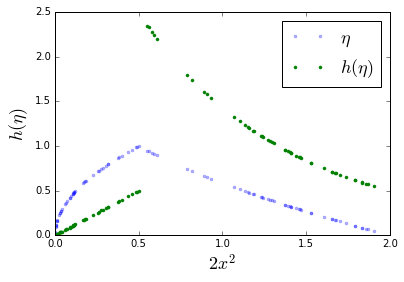

In [15]:
import matplotlib
matplotlib.use('Agg')
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = subplots()
ax.plot(d.xi, d.eta, ".", alpha=.3, label="$\eta$")
ax.plot(d.xi, d.h, ".", label="$h(\eta)$")
ax.legend(loc=0, fontsize=18)
ax.set_xlabel("$2 x^2$", fontsize=18)
ax.set_ylabel("$h(\eta)$", fontsize=18)

# Information Entropy

In [7]:
import sympy as S
from sympy import stats
p, t = S.symbols("p, t", positive=True)
x = stats.Binomial("x", 10, p)
mgf = stats.E(S.exp(t*x))

print(S.simplify(stats.E(x)))
print(S.simplify(S.diff(mgf, t).subs(t, 0)))

print(S.simplify(stats.moment(x, 1)))
print(S.simplify(stats.moment(x, 2)))

10*p
10*p
10*p
10*p*(9*p + 1)


In [1]:
import sympy as S
from sympy import stats
S.var('x:2', real=True)
S.var('mu:2', real=True)
S.var('sigma:2', positive=True)
S.var('t', positive=True)
x0 = stats.Normal(x0, mu0, sigma0)
x1 = stats.Normal(x1, mu1, sigma1)
mgf0 = S.simplify(stats.E(S.exp(t * x0)))
mgf1 = S.simplify(stats.E(S.exp(t * x1)))
mgfY = S.simplify(mgf0 * mgf1)
S.collect(S.expand(S.log(mgfY)), t)

t**2*(sigma0**2/2 + sigma1**2/2) + t*(mu0 + mu1)

# モンテカルロサンプリング

In [4]:
import pandas as pd
import numpy as np
from pandas import DataFrame
u = np.random.rand(100)
df = DataFrame(data=u, columns=["u"])
labels = [1, 2, 3, 4, 5, 6]
df["v"] = pd.cut(df.u, np.linspace(0, 1, 7), 
                 include_lowest=True, labels=labels)
df.head()

,u,v
0,0.077447,1
1,0.051970,1
2,0.998650,6
3,0.812629,5
4,0.741087,5


In [5]:
df.groupby("v").count()

,u
v,
1,12
2,21
3,17
4,18
5,20
6,12


In [9]:
df["v"] = pd.cut(df.u, [0, 1/12, 2/12, 3/12, 2/4, 3/4, 1], 
                 include_lowest=True, labels=labels)
df.groupby("v").count() / df.shape[0]

,u
v,
1,0.11
2,0.01
3,0.09
4,0.29
5,0.24
6,0.26


TypeError: len() of unsized object

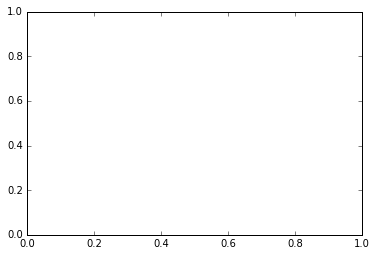

In [18]:
from numpy import array, log
import scipy.stats
alpha = 1.
nsamp = 1000
u = scipy.stats.uniform(0, 1)
Finv = lambda u: 1/alpha*log(1/(1-u))
v = array(map(Finv, u.rvs(nsamp)))

fig,ax=subplots()
scipy.stats.probplot(v, (1,), dist="expon", plot=ax)